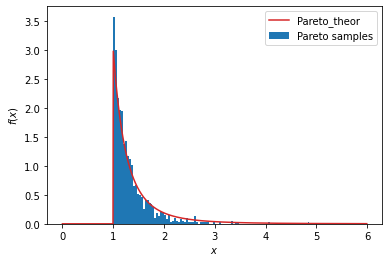

In [1]:
import numpy as np
from scipy.stats import pareto


%matplotlib inline
import matplotlib.pyplot as plt

# отдельно функция парето
def my_pareto_pdf(x, k, x_m):
    if x >= x_m:
        pdv = k
        pdv *= x_m**k
        pdv /= x ** (k + 1)
        return pdv
    else:
        return 0

# строим гистаграмму по выборке объема 1000 и теорит. поверх нее
# генерируем распределение паретто объем выборки 1000
# экспериментальная
k, x_m = 4.0, 1.
par = (1 + np.random.pareto(k, 1000)) * x_m 
plt.hist(par, 100, density=True, label='Pareto samples') # значение normed - Deprecated вместо него density
# теоретическая 
x = np.arange(0., 6., .006)
plt.plot(x, [my_pareto_pdf(val, k=3, x_m=1) for val in x], color='tab:red', label='Pareto_theor')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

In [2]:
# функция для подсчета среднего значения чисел в массиве
def calc_avg(a):
    calc_sum = 0
    lena = len(a)
    for i in range(lena):
        calc_sum = calc_sum + a[i]
    return calc_sum / lena

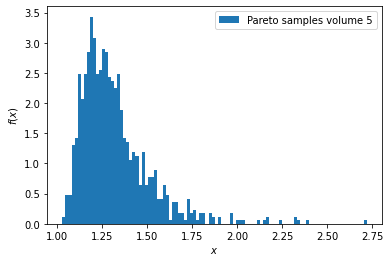

sample average = 1.3281974795809468


In [3]:
# приступаем к основной задаче
# оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок

# генерируем 1000 выборок обьема 5

mean = []
volume = 5
k, x_m = 4.0, 1.
for i in range(1000):                           # тысячу раз
    p = (1 + np.random.pareto(k, volume)) * x_m # получаем 5 чисел
    avg = calc_avg(p)                           # вычисляем их среднее
    mean.append(avg)                            # кладем в массив средних значений 

# рисуем гистограмму на основе полученных эксперементальных данных
plt.hist(mean, 100, density=True, label='Pareto samples volume 5')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()
# среднее исходного распределения vol = 1
print("sample average =", par.mean())


In [10]:

# математическое ожидание теор
mu = (k * x_m)/(k - 1)
print("expected value       =", mu)

# среднеквадратичное отклонение 
var = np.sqrt((k / (k-2)) * (x_m / (k - 1))**2)
print("variance             =", var)

# стандартная ошибка 
sd = var / np.sqrt(volume)
print("standart deviation   =", sd)

# SE
sigma = (k / (k-2)) * ((x_m / (k - 1))**2)
print("sigma                =", sigma)

# коэффииент ассиметрии теор
gamma = (2*(1 + k)/(k - 3))*np.sqrt(1 - 2/k)
print("skewness             =", gamma)

expected value       = 1.3333333333333333
variance             = 0.4714045207910317
standart deviation   = 0.21081851067789195
sigma                = 0.2222222222222222
skewness             = 7.0710678118654755


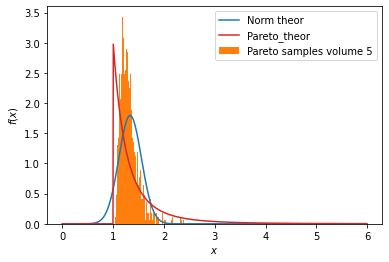

In [5]:
from scipy import stats

norm_rv = stats.norm(mu, sigma)
plt.plot(x,norm_rv.pdf(x),label='Norm theor')
plt.hist(mean, 100, density=True, label='Pareto samples volume 5')
plt.plot(x, [my_pareto_pdf(val, k=3, x_m=1) for val in x], color='tab:red', label='Pareto_theor')

plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()